In [1]:
!pip install pandas
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn import tree
from sklearn import ensemble
wine = pd.read_pickle('winelist-1.pkl')

In [2]:
G = np.unique(wine['drink'])

grape = {g:n for n,g in zip(range(0,len(G)),G)}

C = np.unique(wine['country'])

land = {g:n for n,g in zip(range(0,len(C)),C)}

D = np.unique(wine['description'])

flavour = {g:n for n,g in zip(range(0,len(D)),D)}

wine_price = []
for i in wine['price']:
    wine_price.append(float(i))
wine_grape = []
for i in wine['drink']:
    wine_grape.append(grape[i])
wine_desc = []
for i in wine['description']:
    wine_desc.append(flavour[i])
wine_land = []
for i in wine['country']:
    wine_land.append(land[i])

In [45]:

scores_tree = []
for i in range(0,100):
    X_train, X_test, price_train, price_test = train_test_split(np.transpose([wine_desc,wine_land,wine_grape]), wine_price, test_size=0.33)
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, price_train)
    preds = clf.predict(X_test)
    score = mean_squared_error(price_test,preds)
    scores_tree.append(score)
print(np.mean(scores_tree))

405.37440672823027


(array([ 4., 19., 26., 25., 11.,  5.,  2.,  4.,  2.,  2.]),
 array([173.45345661, 242.34127999, 311.22910337, 380.11692676,
        449.00475014, 517.89257352, 586.78039691, 655.66822029,
        724.55604367, 793.44386706, 862.33169044]),
 <BarContainer object of 10 artists>)

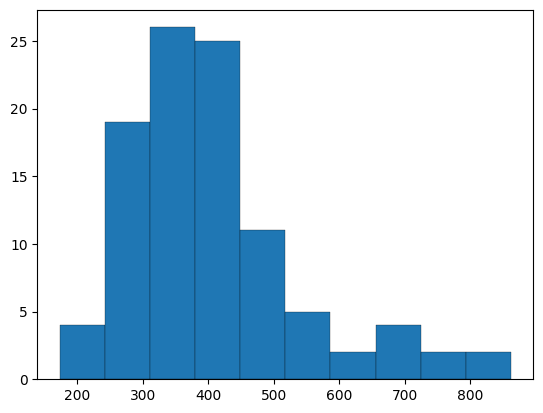

In [46]:
plt.hist(scores_tree,ec='black',lw=0.2)

In [25]:
scores_bayes = []
for i in range(0,100):
    X_train, X_test, price_train, price_test = train_test_split(np.transpose([wine_desc,wine_land,wine_grape]), wine_price, test_size=0.33)
    reg = linear_model.BayesianRidge()
    reg.fit(X_train, price_train)
    preds = reg.predict(X_test)
    score = mean_squared_error(price_test,preds)
    scores_bayes.append(score)
print(np.mean(scores_bayes))

730.7417607260594


(array([ 4.,  5., 18., 22., 12., 16., 14.,  8.,  0.,  1.]),
 array([ 222.6577433 ,  338.98302717,  455.30831104,  571.6335949 ,
         687.95887877,  804.28416264,  920.6094465 , 1036.93473037,
        1153.26001424, 1269.5852981 , 1385.91058197]),
 <BarContainer object of 10 artists>)

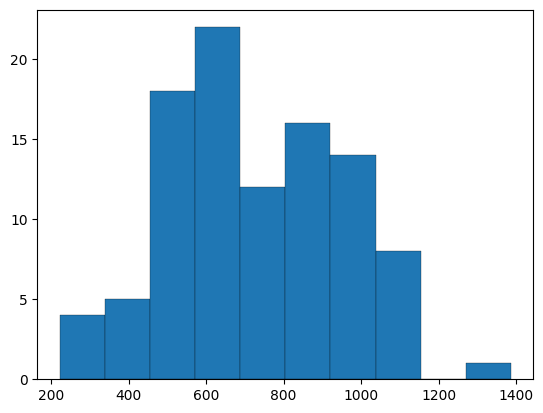

In [21]:
plt.hist(scores_bayes,ec='black',lw=0.2)


In [15]:
scores_GBR = []
params = {
    "n_estimators": 2000,
    "max_depth": 6,
    "min_samples_split": 5,
    "learning_rate": 0.2,
    "loss": "squared_error",
}

for i in range(0,100):
    X_train, X_test, price_train, price_test = train_test_split(np.transpose([wine_desc,wine_land,wine_grape]), wine_price, test_size=0.33)
    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, price_train)
    preds = reg.predict(X_test)
    score = mean_squared_error(price_test,preds)
    scores_GBR.append(score)




In [44]:
print(np.mean(scores_GBR))

401.1307308551434


(array([18., 27., 31.,  7.,  5.,  3.,  4.,  2.,  2.,  1.]),
 array([ 182.06191658,  266.47450988,  350.88710318,  435.29969648,
         519.71228977,  604.12488307,  688.53747637,  772.95006967,
         857.36266297,  941.77525627, 1026.18784957]),
 <BarContainer object of 10 artists>)

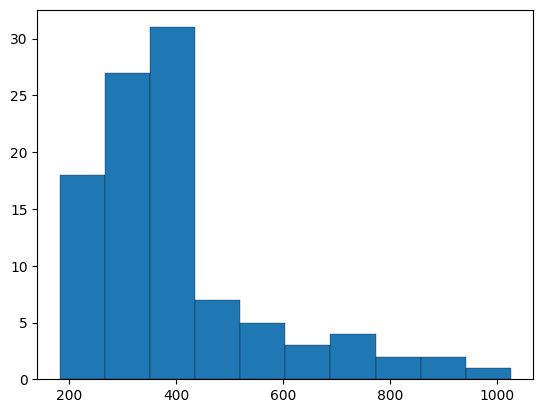

In [16]:
plt.hist(scores_GBR,ec='black',lw=0.2)

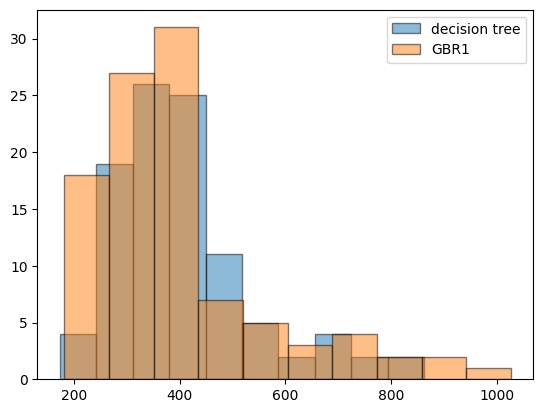

In [47]:
plt.hist(scores_tree, alpha=0.5, label='decision tree',ec='black')
plt.hist(scores_GBR, alpha=0.5, label='GBR1',ec='black')
#plt.hist(scores_GBR2, alpha=0.5, label='GBR2',ec='black')
plt.legend(loc='upper right')
plt.show()


In [49]:
print(np.mean(scores_tree))
print(np.mean(scores_bayes))
print(np.mean(scores_GBR))

405.37440672823027
730.7417607260594
401.1307308551434


In [54]:
for i in range(0,20):
    print(price_test[i],preds[i])

11.99 21.06142857142857
9.99 17.49
14.99 12.49
55.99 36.790000000000006
13.99 15.99
8.99 10.99
19.99 21.066923076923082
12.99 17.256666666666668
9.99 13.99
9.99 25.0
9.99 9.99
16.99 12.49
27.99 33.656666666666666
17.99 17.99
9.99 17.190000000000005
9.99 9.99
72.99 20.19
11.99 10.99
11.99 9.99
9.99 17.190000000000005


In [63]:
x_train,x_test, price_train, price_test = train_test_split(np.transpose([wine['name'].to_list(),wine_desc,wine_land,wine_grape]), wine_price, test_size=0.33)


In [67]:
X_train  = []
X_test = []
for i in x_train:
    X_train.append(i[1:])
for i in x_test:
    X_test.append(i[1:])

In [68]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, price_train)
preds = clf.predict(X_test)
score = mean_squared_error(price_test,preds)
scores_tree.append(score)

In [69]:
test = pd.DataFrame(zip(),columns=['name',])

348.0606290702681
